# Load & Inspect Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data = pd.read_csv("conversion_data.csv")
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


# Data Cleaning

### 1. Age above 100 is not reasonable

In [4]:
data = data.loc[data.age < 100,:]

In [5]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


### 2. Check if there's null value

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
country                316198 non-null object
age                    316198 non-null int64
new_user               316198 non-null int64
source                 316198 non-null object
total_pages_visited    316198 non-null int64
converted              316198 non-null int64
dtypes: int64(4), object(2)
memory usage: 16.9+ MB


In [7]:
data.isnull().values.any()

False

# Exploratory Analysis

### 1. Inspect country conversion

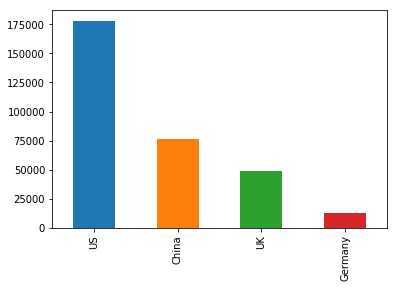

In [8]:
country = data.country.value_counts()
country.plot(kind='bar')

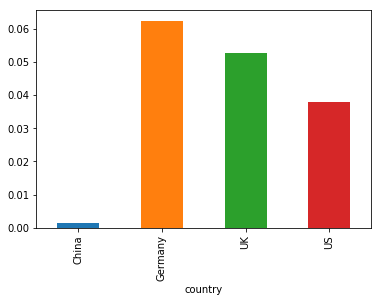

In [9]:
country_grouped = data.groupby("country")["converted"].mean()
country_grouped.plot(kind='bar')

### 2. Inspect age conversion

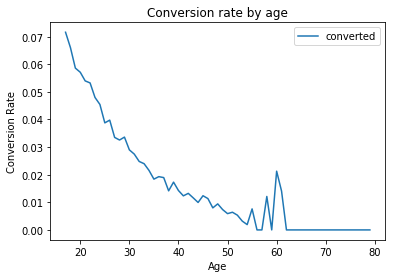

In [31]:
age_grouped = data[['age', 'converted']].groupby('age').mean()

age_grouped.plot()
plt.title('Conversion rate by age')
plt.ylabel('Conversion Rate')
plt.xlabel('Age')
plt.show()

summary: xxxx

### 3. Inspect the relationship between source & total age

In [67]:
age_grouped2 = data[['source','age']].groupby(['source','age']).size()
age_grouped2.head()

# Series to dataframe
age_grouped2 = age_grouped2.to_frame().reset_index()
age_grouped2.head()
age_grouped2.source.unique()

array(['Ads', 'Direct', 'Seo'], dtype=object)

In [94]:
# create source value as Y
ads = age_grouped2[age_grouped2.source == 'Ads']
direct = age_grouped2[age_grouped2.source == 'Direct']
seo = age_grouped2[age_grouped2.source == 'Seo']

ads.columns = ['source','age','amt']
direct.columns = ['source','age','amt']
seo.columns = ['source','age','amt']

In [69]:
# create age series as X
#age = pd.Series(range(17,80))
#len(age.values)
#len(ads.values)

54

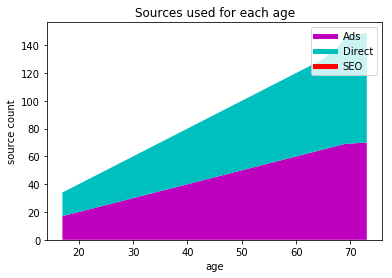

In [106]:
plt.plot([],[],color='m', label='Ads', linewidth=5)
plt.plot([],[],color='c', label='Direct', linewidth=5)
plt.plot([],[],color='r', label='SEO', linewidth=5)

plt.stackplot(seo.age.values,ads.age.values,direct.age.values, colors=['m','c','r'])

plt.xlabel('age')
plt.ylabel('source count')
plt.title('Sources used for each age')
plt.legend()
plt.show()

In [105]:
seo.amt.values.mean()

2871.0925925925926

summary: xxx

# Predictive Modeling

After exploratory analysis, now I start to build predictive models. The dependent variable is binary so some possible machine learning algorism:


- Logistic regression
- Decision Trees
- Naive Bayes
- KNN

## Data Preparation

In [117]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
country                316198 non-null object
age                    316198 non-null int64
new_user               316198 non-null int64
source                 316198 non-null object
total_pages_visited    316198 non-null int64
converted              316198 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.9+ MB


In [116]:
data.converted = data.converted.astype('category')
data.new_user = data.new_user.astype('category')

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
country                316198 non-null object
age                    316198 non-null int64
new_user               316198 non-null category
source                 316198 non-null object
total_pages_visited    316198 non-null int64
converted              316198 non-null category
dtypes: category(2), int64(2), object(2)
memory usage: 22.7+ MB


In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, classification_report
from sklearn import linear_model
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

warnings.filterwarnings("ignore")

## Logistic

In [ ]:
clf = linear_model.LogisticRegression(C=1e5,multi_class='multinomial',solver ='newton-cg')